In [1]:
import decode_eeg
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'C01'
data_dir = f'./data/{experiment_name}'
exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)

In [3]:
ss1,ss2 = [11], [20]
time_window = 100
time_step = 25
trial_average = 20
n_splits = 300
group_dict = {0:ss1,1:ss2}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

In [4]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.setup_data(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_split(xdata,ydata):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3


In [5]:
interp_12 = decode_eeg.Interpreter(clfr)
# interp.labels = [1,2]
# interp.plot_acc(significance_testing=False,savefig=False,ylim=[.35,1],chance_text_y=.23, title='Decode load, 1vs2')

In [6]:
ss1,ss2 = [11], [20]
group_dict = {0:ss1,1:ss2}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

In [7]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.setup_data(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_split(xdata,ydata):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3


In [8]:
interp_hl12 = decode_eeg.Interpreter(clfr)
interp = decode_eeg.Interpreter(clfr)

In [9]:
interp.acc = np.concatenate((interp_12.acc[:,np.newaxis],interp_hl12.acc[:,np.newaxis]),1)
interp.acc_shuff = np.concatenate((interp_12.acc_shuff[:,np.newaxis],interp_hl12.acc_shuff[:,np.newaxis]),1)

In [10]:
interp.subtitle = '1vs2_h1vs2'
interp.save_results()

1vs2 mean delay accuracy: 0.764778806584362
1vs2 mean delay S.D.: 0.0376859673846398
H1vs2 mean delay accuracy: 0.7332818930041152
H1vs2 mean delay S.D.: 0.03395531985139846
mean delay accuracy: 0.7332818930041152
mean delay S.D.: 0.03395531985139846
Saving output\figures\1vs2_h1vs2acc.pdf
Saving output\figures\1vs2_h1vs2acc.png


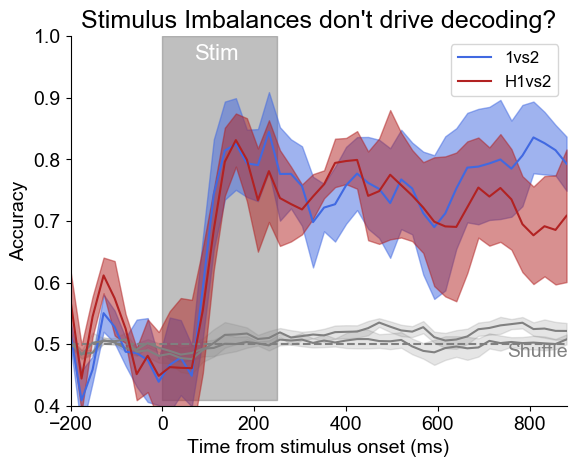

In [14]:
interp.plot_acc_compare_subset(subset_list=['1vs2','H1vs2'],chance=.5,ylim=[.4,1],title="Stimulus Imbalances don't drive decoding?",savefig=True)